In [3]:
import sys
import os
sys.path.append(os.path.abspath(".."))
os.chdir("..") 
print("CWD:", os.getcwd()) 

CWD: /Users/oliver/Desktop/BitcoinGraphClassification


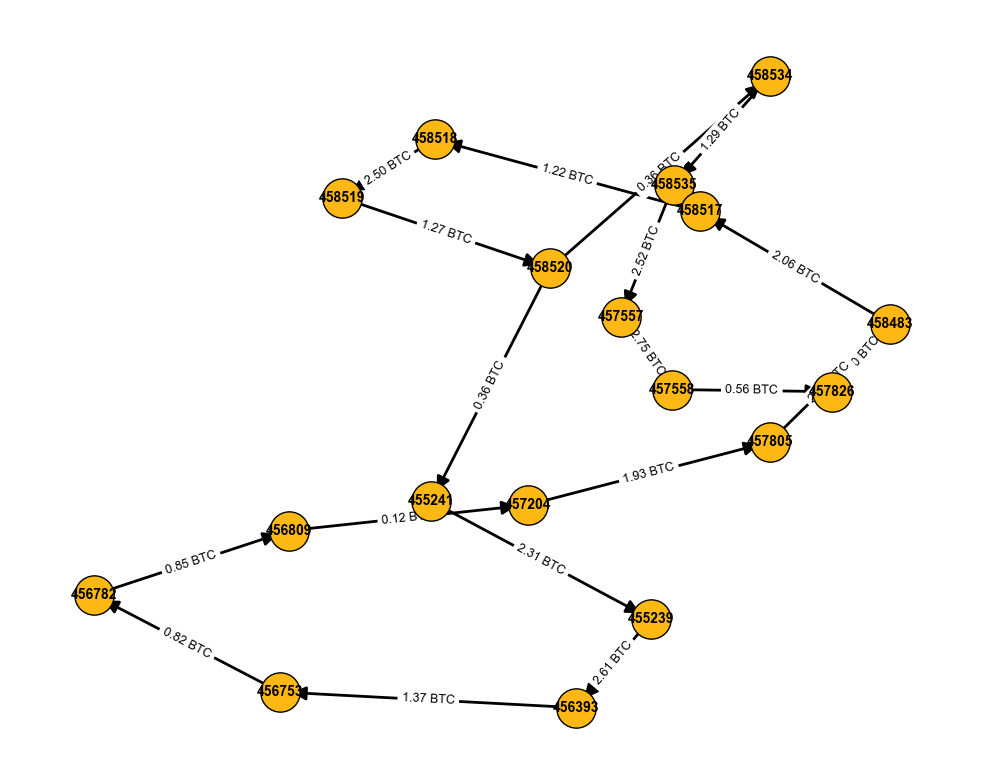

In [ ]:
import torch
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx
from src.data_loader import load_wallet_graph_combined

data = load_wallet_graph_combined("data/raw")

G_full = to_networkx(data, to_undirected=False)

components = sorted(nx.strongly_connected_components(G_full), key=len, reverse=True)

for comp in components:
    if 5 <= len(comp) <= 20:
        sub_nodes = list(comp)
        break

G_sub = G_full.subgraph(sub_nodes).copy()


edge_weights = torch.rand(data.edge_index.size(1)) * 3  # simulate BTC amounts
edge_labels = {}
for i, (u, v) in enumerate(data.edge_index.t().tolist()):
    if u in G_sub and v in G_sub:
        edge_labels[(u, v)] = f"{edge_weights[i]:.2f} BTC"

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_sub, seed=42)

nx.draw_networkx_nodes(G_sub, pos, node_color="#FDB813", node_size=800, edgecolors="black")
nx.draw_networkx_edges(G_sub, pos, arrows=True, arrowstyle='-|>', arrowsize=20, width=2)
nx.draw_networkx_labels(G_sub, pos, font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G_sub, pos, edge_labels=edge_labels, font_size=9)

plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

gcn_results = pd.read_csv("results/results_GCN.csv")
sage_results = pd.read_csv("results/results_GraphSAGE.csv")

In [41]:
summary = {
    "Model": ["GCN", "GraphSAGE"],
    "Best F1": [gcn_results["f1"].max(), sage_results["f1"].max()],
    "Best Acc": [gcn_results["acc"].max(), sage_results["acc"].max()],
    "Best PR-AUC": [
        gcn_results["pr_auc"].max(),
        sage_results["pr_auc"].max()
    ],
    "Epoch of Best F1": [
        gcn_results["f1"].idxmax() + 1,
        sage_results["f1"].idxmax() + 1
    ]
}
print("Summary of Results:")
print(pd.DataFrame(summary))

Summary of Results:
       Model  Best F1  Best Acc  Best PR-AUC  Epoch of Best F1
0        GCN   0.5994    0.9243       0.1503                15
1  GraphSAGE   0.6762    0.8741       0.3792                92


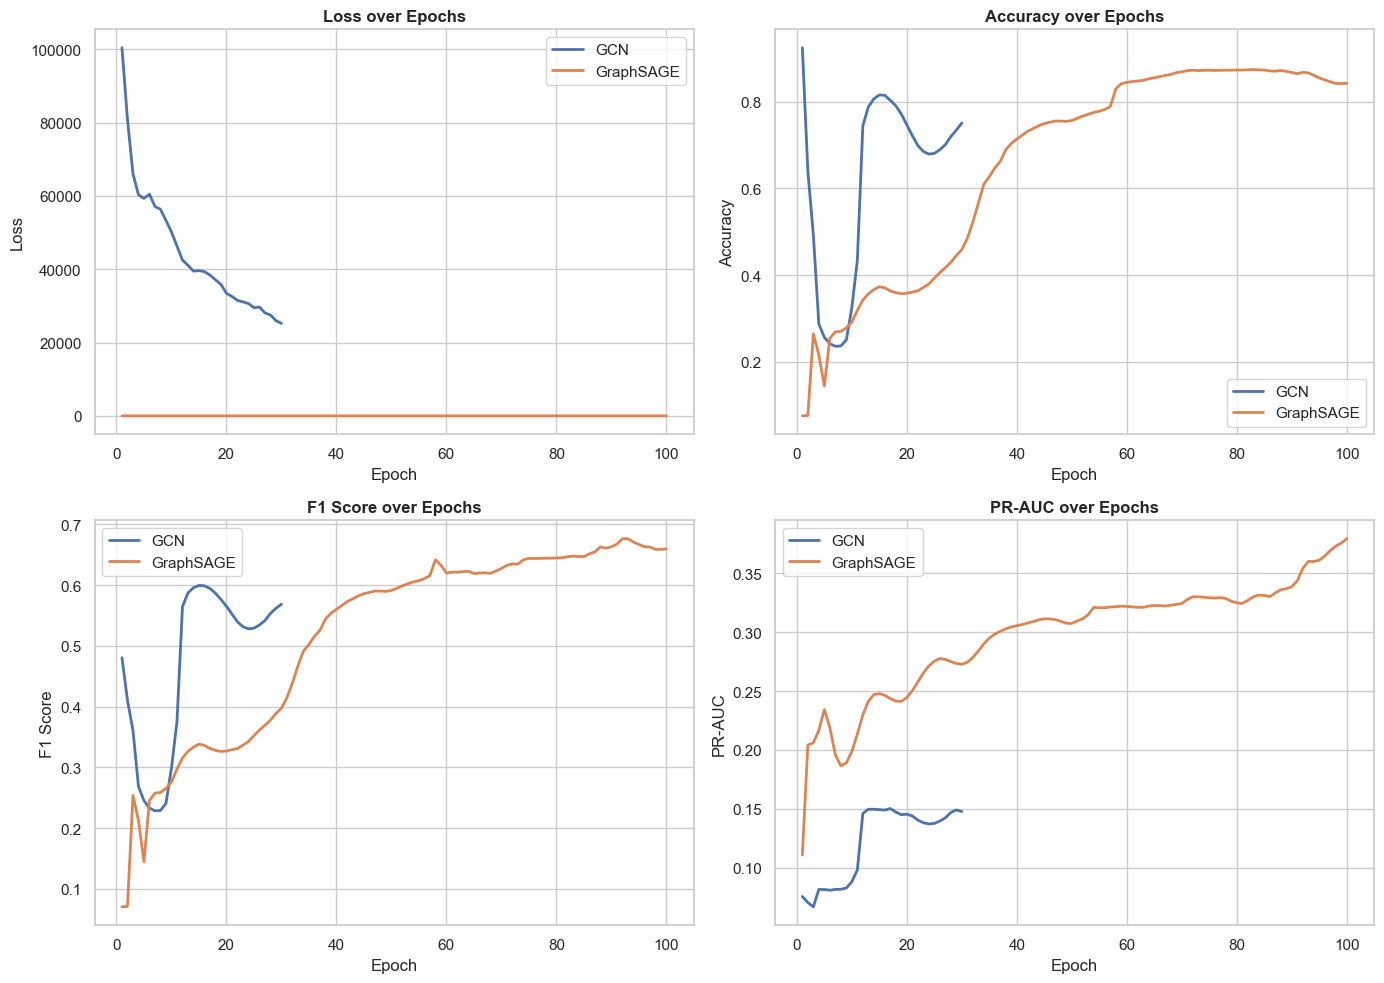

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

gcn_results = pd.read_csv("results/results_GCN.csv")
sage_results = pd.read_csv("results/results_GraphSAGE.csv")

sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

# plot loss
plt.subplot(2, 2, 1)
plt.plot(gcn_results["epoch"], gcn_results["loss"], label="GCN", linewidth=2)
plt.plot(sage_results["epoch"], sage_results["loss"], label="GraphSAGE", linewidth=2)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# plot accuracy
plt.subplot(2, 2, 2)
plt.plot(gcn_results["epoch"], gcn_results["acc"], label="GCN", linewidth=2)
plt.plot(sage_results["epoch"], sage_results["acc"], label="GraphSAGE", linewidth=2)
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# plot f1 score
plt.subplot(2, 2, 3)
plt.plot(gcn_results["epoch"], gcn_results["f1"], label="GCN", linewidth=2)
plt.plot(sage_results["epoch"], sage_results["f1"], label="GraphSAGE", linewidth=2)
plt.title("F1 Score over Epochs")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend()

# plot pr-auc
plt.subplot(2, 2, 4)
plt.plot(gcn_results["epoch"], gcn_results["pr_auc"], label="GCN", linewidth=2)
plt.plot(sage_results["epoch"], sage_results["pr_auc"], label="GraphSAGE", linewidth=2)
plt.title("PR-AUC over Epochs")
plt.xlabel("Epoch")
plt.ylabel("PR-AUC")
plt.legend()

plt.tight_layout()
plt.show()
